In [8]:
from wearsed.training.metric import metric, correct
import matplotlib.pyplot as plt
import pandas as pd

<Axes: >

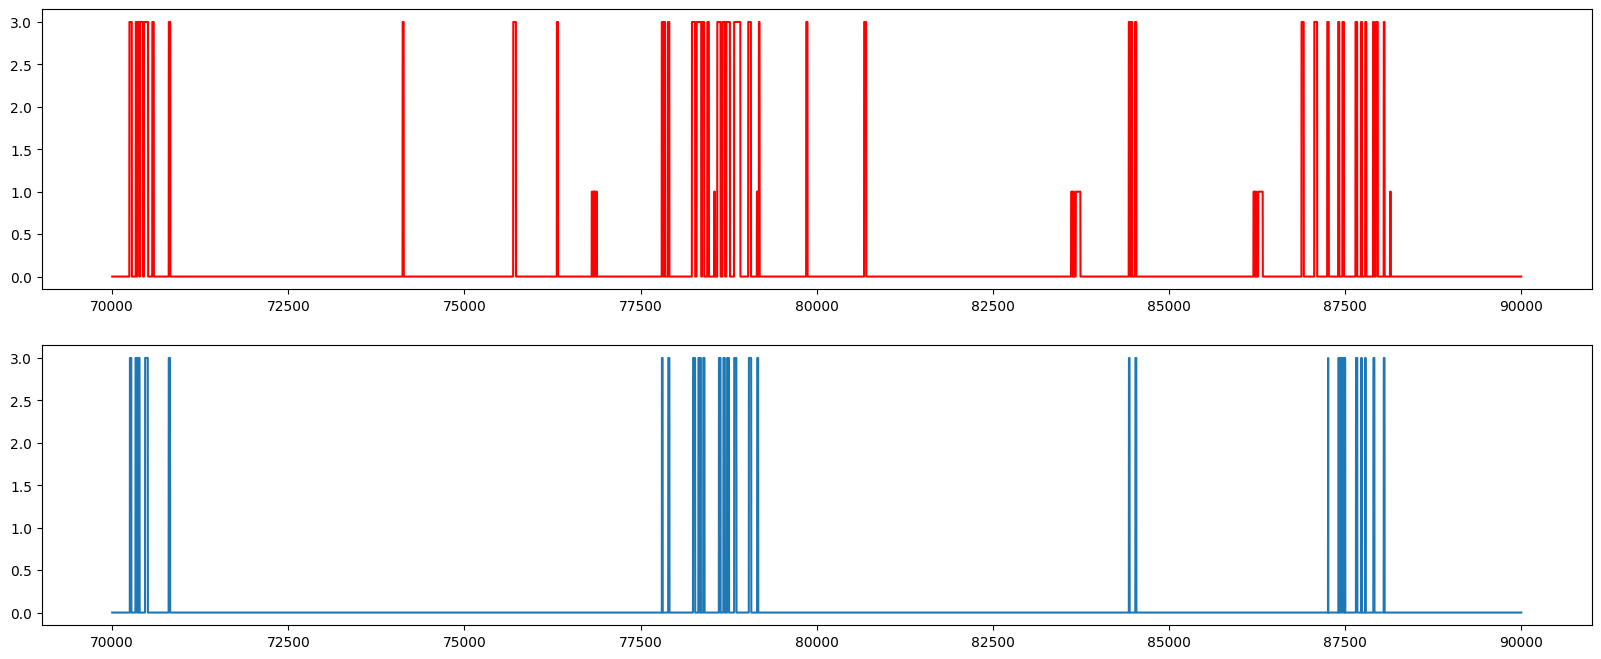

In [3]:
output = pd.read_csv('../wearsed/training/baseline_conv/output/first_multi_class/test_preds_epoch_18.csv')
y_true, y_pred = output['targets'], output['predictions']
_, axs = plt.subplots(2, 1, figsize=(20, 8))
start = 70000
y_true[start:start+20000].plot(ax=axs[0], color='red')
y_pred[start:start+20000].plot(ax=axs[1])

In [4]:
from collections import Counter
Counter(y_pred)

Counter({0: 20473384, 3: 1037397, 1: 146819})

In [5]:
Counter(y_true)

Counter({0: 18976646, 3: 1849273, 1: 697043, 2: 134638})

In [6]:
'''
CSA   150k
OSA   600k
HYP  1800k
NOR 20000k
'''

'\nCSA   150k\nOSA   600k\nHYP  1800k\nNOR 20000k\n'

<Axes: >

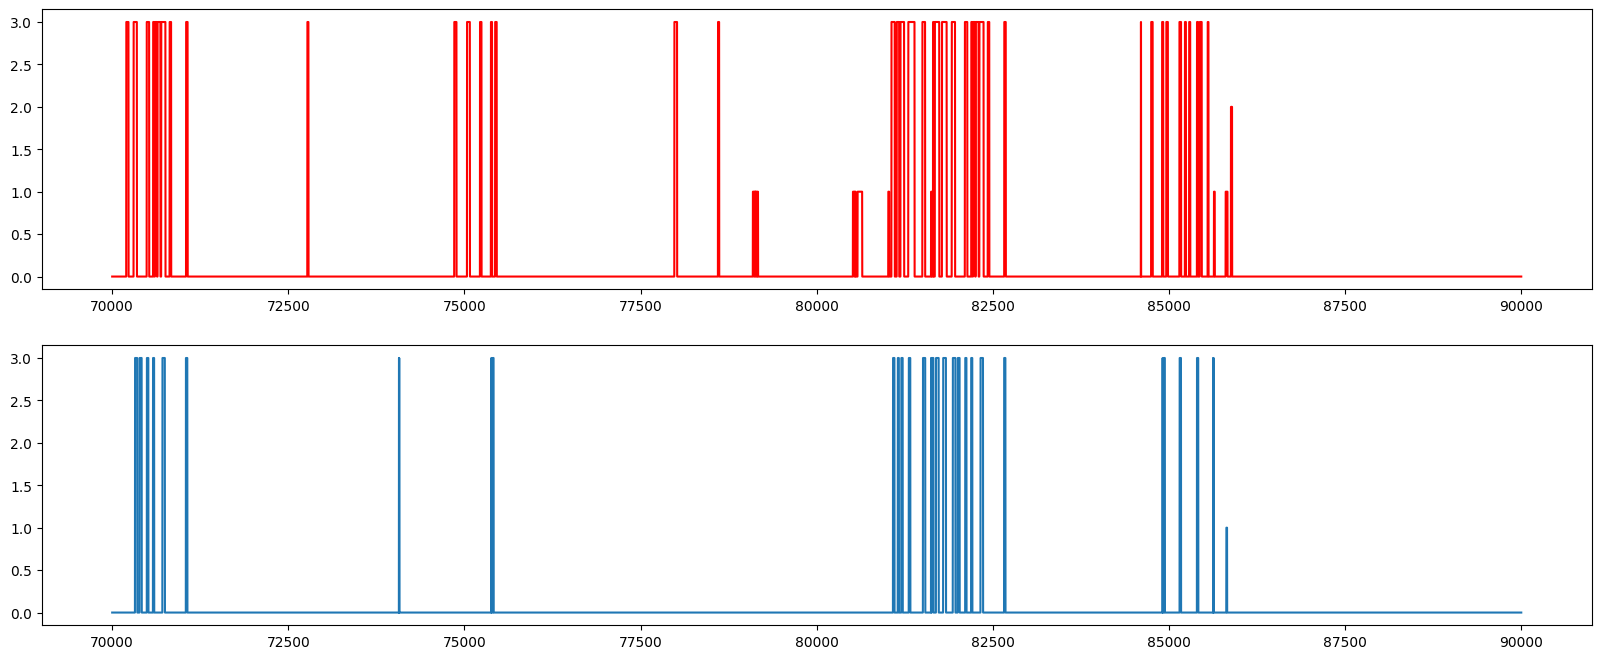

In [7]:
output = pd.read_csv('../wearsed/training/baseline_conv/output/first_multi_class/test_preds_epoch_36.csv')
y_true, y_pred = output['targets'], output['predictions']
_, axs = plt.subplots(2, 1, figsize=(20, 8))
start = 70000
y_true[start:start+20000].plot(ax=axs[0], color='red')
y_pred[start:start+20000].plot(ax=axs[1])

# Look at results when interpreting the output as event vs no event

In [12]:
y_true[y_true > 1] = 1
y_pred[y_pred > 1] = 1

In [14]:
def get_precision_recall(y_true, y_pred, correctify):
    TP, FP, FN = metric(y_pred, y_true, correctify=correctify)
    precision = TP / (TP + FP) if TP > 0 else 0
    recall = TP / (TP + FN) if TP > 0 else 0
    return precision, recall


for correctify in [True, False]:
    print(f'### Correction:', correctify)
    precision, recall = get_precision_recall(y_true, y_pred, correctify)
    print('Precision: ', precision)
    print('Recall   : ', recall)
    print('F1       : ', (2 * precision * recall) / (precision + recall))

### Correction: True
Precision:  0.9450935787405645
Recall   :  0.3665420129733415
F1       :  0.5282206505956208
### Correction: False
Precision:  0.8752373042240151
Recall   :  0.4437303870948337
F1       :  0.5888990160400769
